# Module 1 Practice

## Example #1: Wikipedia Countries by Population

For this practice exmple, we're going to scrape and parse the wikipedia page containing the list of countries by population.

**1. Scrape the wikipedia page on countries by population URL:https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)**

In [12]:
## quietly load rvest and tidyverse
suppressPackageStartupMessages(library(rvest))
suppressPackageStartupMessages(library(tidyverse))

## read in wikipedia page
pop <- read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")

**2. Extract all the heading 2 texts. Make sure to remove white space.**

In [13]:
## extract heading 2 text
pop %>% 
  html_nodes("h2") %>% 
  html_text(trim = TRUE)

[1] "Contents"             "List[edit]"           "See also[edit]"      
[4] "Notes[edit]"          "References[edit]"     "External links[edit]"
[7] "Navigation menu"

**3. It looks like the wikipedia page contains a couple of tables. Extract all tables and convert them into data frames. Make sure to fill missing cells with `NA`s.**

In [14]:
## table
poptabs <- html_table(pop)

**4. Using the `lapply` function, print the first 6 rows of each data frame in `poptabs`. Select the table that contains the list of countries and populations and store it as `poptab`.**

In [15]:
## preview poptabs tables
lapply(poptabs, head)

## select countries/populations
poptab <- poptabs[[3]]

[[1]]
  X1
1 NA
                                                                                                                                               X2
1 It has been suggested that this article be merged into List of countries and dependencies by population. (Discuss) Proposed since January 2018.

[[2]]
                                                                                                  X1
1 Statistical regions as defined by the United Nations Statistics Division.[1]Antarctica is omitted.

[[3]]
      Rank Country or area UN continental\nregion[1] UN statistical\nregion[1]
1 <U+2014>           World                  <U+2014>                  <U+2014>
2        1        China[a]                      Asia              Eastern Asia
3        2           India                      Asia             Southern Asia
4        3   United States                  Americas          Northern America
5        4       Indonesia                      Asia        South-Eastern Asia
6        5          Brazil                  Americas             South America
  Population\n(1 July 2016)[2] Population\n(1 July 2017)[2]
1                7,466,964,280                7,550,262,101
2                1,403,500,365                1,409,517,397
3                1,324,171,354                1,339,180,127
4                  322,179,605                  324,459,463
5                  261,115,456                  263,991,379
6                  207,652,865                  209,288,278
                            Change
1 7000111555135228260<U+2660>+1.1%
2 6999428716097982630<U+2660>+0.4%
3 7000113344643460699<U+2660>+1.1%
4 6999707635730076710<U+2660>+0.7%
5 7000110139899186970<U+2660>+1.1%
6 6999787570641031120<U+2660>+0.8%

[[4]]
  v\nt\ne\n\nLists of countries by population statistics
1                                       World population
2                                            Continental
3                                               Regional
4                                                 Cities
5                            Past and future\npopulation
6                                     Population density
                                                                                                      v\nt\ne\n\nLists of countries by population statistics
1                                                                                                    Current population\nCurrent population (United Nations)
2                                                                                                                    Africa\nAmericas\nAsia\nEurope\nOceania
3                 Arab world\nCaribbean\nCommonwealth of Nations\nEurasia\nEuropean Union\nIslands\nLatin America\nNorth America\nMiddle East\nSouth America
4                                                               National capitals\nCities proper\nMetropolitan areas\nUrban areas\nMegacities\nMegalopolises
5 Past population (United Nations)\nPast and future population\n1\n1000\n1500\n1600\n1700\n1800\n1900\n1907\n1939\n1989\n2000\n2005\n2010\nFuture population
6                                                                                       Current density\nCurrent real density based on food growing capacity

This leaves some work to do (removing commas from numbers, fixing headers for multi-column spans, etc.).

**5. To clean up the data first set the names to lower case and remove all spaces, hyphens, etc.**

In [16]:
names(poptab) <- c(
    "rank", "country", "continental_region", "statistical_region", "population_2016",
    "population_2017", "change"
)

**6. There's some funky encoding going on. Remove the long dashes and replace them with the minus/normal dash and then convert the columns to ASCII.**

In [17]:
## replace dashes
poptab[, 1:ncol(poptab)] <- lapply(poptab, stringr::str_replace_all, "−|\u2212", "-")

**7. Convert the change column into two variable columns: change (total change) and change_pct (percent change)**

In [18]:
## extract the percentage value in change
poptab$change_pct <- stringr::str_extract(poptab$change, "(?<=\\D).*(?=%)")
## extract the total change number
poptab$change <- stringr::str_extract(poptab$change, "\\-?\\d+")

**8. Fix the format of the columns that should probably be considered numeric or integer. Print the first six rows of the data.**

In [19]:
## identify the column(s) that should probably be considered integer or numeric
nums <- c("rank", "population_2016", "population_2017", "change", "change_pct")

## remove everything that's not a number, minus sign, or decimal and convert to numeric
poptab[nums] <- lapply(poptab[nums], function(x)
  as.numeric(stringr::str_replace_all(x, "[^[:digit:]\\-\\.]", "")))

## set rank var as integer
poptab$rank <- as.integer(poptab$rank)

## preview data
poptab

rank,country,continental_region,statistical_region,population_2016,population_2017,change,change_pct
NA,World,<U+2014>,<U+2014>,7466964280,7550262101,7.000112e+18,1.1
1,China[a],Asia,Eastern Asia,1403500365,1409517397,6.999429e+18,0.4
2,India,Asia,Southern Asia,1324171354,1339180127,7.000113e+18,1.1
3,United States,Americas,Northern America,322179605,324459463,6.999708e+18,0.7
4,Indonesia,Asia,South-Eastern Asia,261115456,263991379,7.000110e+18,1.1
5,Brazil,Americas,South America,207652865,209288278,6.999788e+18,0.8
6,Pakistan,Asia,Southern Asia,193203476,197015955,7.000197e+18,2.0
7,Nigeria,Africa,Western Africa,185989640,190886311,7.000263e+18,2.6
8,Bangladesh,Asia,Southern Asia,162951560,164669751,7.000105e+18,1.1
9,Russia,Europe,Eastern Europe,143964513,143989754,5.000000e+18,0.0


**9. Arrange the rows so the largest change_pct is on top and the smallest change_pct is on bottom.**

In [20]:
arrange(poptab, -change_pct)

rank,country,continental_region,statistical_region,population_2016,population_2017,change,change_pct
127,Oman,Asia,Western Asia,4424762,4636262,7.000478e+18,4.8
152,Bahrain,Asia,Western Asia,1425171,1492584,7.000473e+18,4.7
57,Niger,Africa,Western Africa,20672987,21477348,7.000389e+18,3.9
157,Equatorial Guinea,Africa,Middle Africa,1221490,1267689,7.000378e+18,3.8
46,Angola,Africa,Middle Africa,28813463,29784193,7.000337e+18,3.4
17,Democratic Republic of the Congo,Africa,Middle Africa,78736153,81339988,7.000331e+18,3.3
33,Uganda,Africa,Eastern Africa,41487965,42862958,7.000331e+18,3.3
85,Burundi,Africa,Eastern Africa,10524117,10864245,7.000323e+18,3.2
24,Tanzania[c],Africa,Eastern Africa,55572201,57310019,7.000313e+18,3.1
73,Chad,Africa,Middle Africa,14452543,14899994,7.000310e+18,3.1


**10. Group by statistical_region and arrange by the largest percent change (regardless of positive/negative)**

In [21]:
poptab %>%
    group_by(statistical_region) %>%
    summarise(change_pct = mean(change_pct, na.rm = TRUE)) %>%
    arrange(-abs(change_pct))

statistical_region,change_pct
Middle Africa,2.7444444
Western Africa,2.5000000
Eastern Africa,2.3600000
Western Asia,1.9411765
Northern Africa,1.7714286
Melanesia,1.6800000
Southern Africa,1.6800000
Central Asia,1.6000000
Central America,1.4125000
Southern Asia,1.3888889


## Example #2: IMDB ratings of Star Wars movies

For this example of web scraping, the goal is to find the average IMDB movie rating for all nine Star Wars movies. Since we're scraping content from multiple pages, the code below uses the `lapply()` to apply the reading/scraping function `xml2::read_html()` to each element of the input (the URLs to IMDB Star Wars pages).

**1. Scrape the IMDB pages of all nine Star Wars movies.**

In [22]:
## list of starwars movies URLs
star_wars <- list(
  Phantom = "http://www.imdb.com/title/tt0120915",
  Clones = "http://www.imdb.com/title/tt0121765",
  Sith = "http://www.imdb.com/title/tt0121766",
  RogueOne = "http://www.imdb.com/title/tt3748528",  
  NewHope = "http://www.imdb.com/title/tt0076759",
  Empire = "http://www.imdb.com/title/tt0080684",
  ReturnJedi = "http://www.imdb.com/title/tt0086190",
  Awakens = "http://www.imdb.com/title/tt2488496",
  LastJedi = "http://www.imdb.com/title/tt2527336"
)

## read pages as xml data
h <- lapply(star_wars, xml2::read_html)

## view structure of h elements
str(h[1:2], 1)

List of 2
 $ Phantom:List of 2
  ..- attr(*, "class")= chr [1:2] "xml_document" "xml_node"
 $ Clones :List of 2
  ..- attr(*, "class")= chr [1:2] "xml_document" "xml_node"


Once the pages are stored as an `xml_document`, values can be parsed by specifying nodes identified via `View Source` and/or `Inspect` tools offered in most browsers. You can also use [SelectorGadget, as is done in the example provided as part of the httr package](https://cran.r-project.org/web/packages/rvest/vignettes/selectorgadget.html).

To extract the content associated with certain elements, use {rvest}'s `html_nodes()` along with `html_text()` for text or `html_attr()` for attributes. The code below defines functions for parsing IMDB and MetaCritic ratings. It then converts the parsed values into a data frame.

**3. Write a function that parses the IMDB movie rating as a numeric value from a given xml document. Apply that function to all nine xml documents.**

In [23]:
## function to parse imdb rating
imdb_rating <- function(x) {
  x %>% 
    html_nodes("strong span") %>%
    html_text(trim = TRUE) %>%
    as.numeric()
}

**4. Create a data frame consisting of two variables, film (name of the Star Wars movies) and rating (parsed IMDB movie rating).**

In [24]:
##
## get imdb ratings for each
ratings <- sapply(h, imdb_rating)

## create data frame
df <- data.frame(
  film = names(star_wars),
  rating = ratings,
  stringsAsFactors = FALSE,
  row.names = NULL
)

## preview data
df

film,rating
Phantom,6.5
Clones,6.6
Sith,7.6
RogueOne,7.8
NewHope,8.7
Empire,8.8
ReturnJedi,8.4
Awakens,8.0
LastJedi,7.5


**5. Plot the mean IMDB movie ratings for all nine Star Wars movies. Which one is the best? Which one is the worst?**

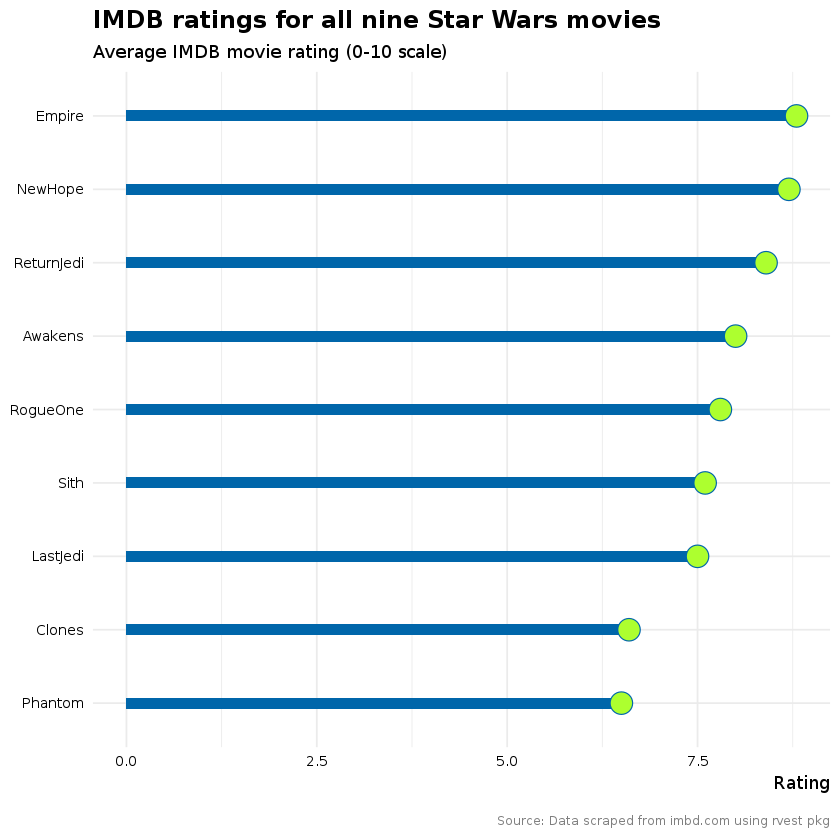

In [25]:
## plot
df %>%
  arrange(rating) %>%
  mutate(film = factor(film, levels = unique(film))) %>%
  ggplot(aes(x = film, y = rating)) +
  geom_col(fill = "#0066aa", width = .15) +
  geom_point(colour = "#0066aa", 
             fill = "greenyellow", shape = 21, size = 6) + 
  theme_minimal(base_family = "Helvetica Neue", base_size = 12) +
  theme(
    legend.position = "bottom",
    plot.caption = element_text(
        hjust = 1.0, colour = "gray50", size = rel(.6)),
    axis.text = element_text(colour = "black", size = rel(.7)),
    axis.title = element_text(hjust = 1.0, size = rel(.9)),
    legend.text = element_text(size = rel(.8)),
    plot.title = element_text(face = "bold")) + 
  labs(
    y = "Rating", x = NULL, 
    title = "IMDB ratings for all nine Star Wars movies",
    subtitle = "Average IMDB movie rating (0-10 scale)",
    caption = "\nSource: Data scraped from imbd.com using rvest pkg") + 
  coord_flip()